In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#importing modules
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
from os import listdir
X = [] # an element of X is represented as (filename,text)
Y = [] # an element of Y represents the newsgroup category of the corresponding X element
ls=listdir('C:/Users/HP/Downloads/coding_ninja_docs/text classification/20_newsgroups/20_newsgroups')

In [15]:
ls

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [16]:
for category in ls:
    folder=listdir('C:/Users/HP/Downloads/coding_ninja_docs/text classification/20_newsgroups/20_newsgroups/'+category)
    for document in folder:
        with open('C:/Users/HP/Downloads/coding_ninja_docs/text classification/20_newsgroups/20_newsgroups/'+category+'/'+document, "r",encoding="ISO-8859-1") as f:
            X.append((document,f.read()))
            Y.append(category)

In [17]:
#splitting data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

In [18]:
#a list of common words to be removed next 
#without effecting the prediction result
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

# Building Vocabulary:

In [19]:
vocab = {}
for i in range(len(X_train)):
    word_list = []
    for word in X_train[i][1].split():
        word_new  = word.strip(string.punctuation).lower()
        if (len(word_new)>2)  and (word_new not in stopwords):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1

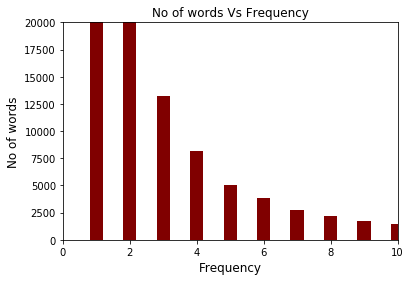

In [20]:
num_words = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
    
plt.axis([0, 10, 0, 20000])
plt.bar(freq,num_words,color='maroon',width = 0.4)
plt.xlabel("Frequency",fontsize=12)
plt.ylabel("No of words",fontsize=12)
plt.title("No of words Vs Frequency",fontsize=12)
plt.show()

In [21]:
# deciding cutoff frequency
cutoff_freq= 50
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with higher frequency than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

Number of words with higher frequency than cutoff frequency(50) : 5938


In [22]:
#creating a list named "feature" with these above words and removing words with less frequency than cut off  
features = []
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)

In [23]:
# representing training data as word vector counts
X_train_dataset = np.zeros((len(X_train),len(features)))
# It'll actually take some time to complete
for i in range(len(X_train)):
    #print(i)
    word_list = [ word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1

In [24]:
# Let's do the same w/ testing data and it's again going to take lots of time
X_test_dataset = np.zeros((len(X_test),len(features)))
for i in range(len(X_test)):
    word_list = [ word.strip(string.punctuation).lower() for word in X_test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

# Implementing Multinomial Naive Bayes from Sklearn

In [25]:
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on training data : 0.9184503567380142
Sklearn's score on testing data : 0.8718
Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.81      0.78       233
           comp.graphics       0.80      0.83      0.81       253
 comp.os.ms-windows.misc       0.82      0.83      0.83       249
comp.sys.ibm.pc.hardware       0.82      0.88      0.85       240
   comp.sys.mac.hardware       0.88      0.93      0.90       236
          comp.windows.x       0.92      0.86      0.89       240
            misc.forsale       0.81      0.86      0.83       261
               rec.autos       0.92      0.93      0.92       269
         rec.motorcycles       0.93      0.97      0.95       284
      rec.sport.baseball       0.99      0.97      0.98       248
        rec.sport.hockey       0.98      0.98      0.98       231
               sci.crypt       0.96      0.90      0.93       233
    

In [26]:
class MultinomialNaiveBayes:
    
    def __init__(self):
        # count is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category 
        self.count = {}
        # classes represents the different news categories
        self.classes = None
    
    def fit(self,X_train,Y_train):
        # This can take some time to complete       
        self.classes = set(Y_train)
        for class_ in self.classes:
            self.count[class_] = {}
            for i in range(len(X_train[0])):
                self.count[class_][i] = 0
            self.count[class_]['total'] = 0
            self.count[class_]['total_points'] = 0
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j]+=X_train[i][j]
                self.count[Y_train[i]]['total']+=X_train[i][j]
            self.count[Y_train[i]]['total_points']+=1
    
    def __probability(self,test_point,class_):
        
        log_prob = np.log(self.count[class_]['total_points']) - np.log(self.count['total_points'])
        total_words = len(test_point)
        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.count[class_][i]+1)-np.log(self.count[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    def __predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.__probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,X_test):
        # This can take some time to complete
        Y_pred = [] 
        for i in range(len(X_test)):
        # print(i) # Uncomment to see progress
            Y_pred.append( self.__predictSinglePoint(X_test[i]) )
        
        return Y_pred
    
    def score(self,Y_pred,Y_true):
        # returns the mean accuracy
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1
        return count/len(Y_pred)

In [27]:
clf2 = MultinomialNaiveBayes()
clf2.fit(X_train_dataset,Y_train)
Y_test_pred = clf2.predict(X_test_dataset)
our_score_test = clf2.score(Y_test_pred,Y_test)  
print("Our score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Our score on testing data : 0.8718
Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.81      0.78       233
           comp.graphics       0.80      0.83      0.81       253
 comp.os.ms-windows.misc       0.82      0.83      0.83       249
comp.sys.ibm.pc.hardware       0.82      0.88      0.85       240
   comp.sys.mac.hardware       0.88      0.93      0.90       236
          comp.windows.x       0.92      0.86      0.89       240
            misc.forsale       0.81      0.86      0.83       261
               rec.autos       0.92      0.93      0.92       269
         rec.motorcycles       0.93      0.97      0.95       284
      rec.sport.baseball       0.99      0.97      0.98       248
        rec.sport.hockey       0.98      0.98      0.98       231
               sci.crypt       0.96      0.90      0.93       233
         sci.electronics       0.89      0.87      0.88       24

In [28]:
print("Score of our model on test data:",our_score_test)
print("Score of inbuilt sklearn's MultinomialNB on the same data :",sklearn_score_test)

Score of our model on test data: 0.8718
Score of inbuilt sklearn's MultinomialNB on the same data : 0.8718
